# Import modules & packages

To be able to use declarations and definitions of an existing module, you should use the `import` clause.
> import module [as alias]

In [1]:
from __future__ import division

## Exercises 1 - The Import system

Import additional modules or packages for the future use in this pipeline.

In [2]:
# the plotting module matplotlib.pyplot as plt
import matplotlib.pyplot

# the numpy package for scientific computing is also a great tool for manipulating arrays
import numpy as np

# the image processing package skimage and ndimage from scipy
import skimage
import scipy.ndimage as ndi

# Importing & Handling Image Data

An image is essentially a **matrix of numbers**. Image processing means to carry out mathematical operations on these numbers. The ideal object for storing and manipulating matrices of numbers is the **array**.
Many mathematical operations are well defined on arrays and can be computed quickly by vector-based computation. Arrays can have any number of **dimensions** (or "axis"). For example, a 2D array could represent the x and y axis of a grayscale image, a 3D array could contain a z-stack (zyx), a 4D array could also have multiple channels for each image (czyx) and a 5D array could have time on top of that (tczyx).

## Exercises 2 - Import the local files

In [3]:
# (i) Specify the filename
# Create a string variable of the file to be imported ('FITC.jpeg')
# Suggested name for the variable: filename_1
# Note: If the file is not in your current working directory, the filename variable must contain the 
#       entire path to the file, for example r'/home/cedric/data/FITC.jpeg'. Note the r at
#       the beginning of the string: it designates this string as a "raw" string, which helps to
#       avoid problems with slashes and other special symbols
filename_1 = r'/home/cedric/Documents/Atelier_Mifobio/jupyter-workshop-mifobio-2018/exercices/PK-11B-pl1/Well-C003/FITC.jpeg'

# Create a string variable of the file to be imported ('Hoechst.jpeg')
filename_2 = r'/home/cedric/Documents/Atelier_Mifobio/jupyter-workshop-mifobio-2018/exercices/PK-11B-pl1/Well-C003/Hoechst.jpeg'

# Create a string variable of the file to be imported ('Tritc.jpeg')
filename_3 = r'/home/cedric/Documents/Atelier_Mifobio/jupyter-workshop-mifobio-2018/exercices/PK-11B-pl1/Well-C003/Tritc.jpeg'

# (ii) Load the images
# Import the function 'imread' from the module 'skimage.io'
from skimage.io import imread

# Load 'FITC.jpeg' and store it in a variable.
# Suggested name for the variable: fitc
fitc = imread(filename_1)

# Load 'Hoechst.jpeg' and store it in a variable.
# Suggested name for the variable: hoechst
hoechst = imread(filename_2)

# Load 'Tritc.jpeg' and store it in a variable.
# Suggested name for the variable: tritc
tritc = imread(filename_3)

## Exercises 3 - Data types of the local files

In [4]:
# Check the data represention of the images
# Check that 'fitc', 'hoechst', 'tritc' is a variable of type 'ndarray' - use Python's built-in function 'type'.
print (type(fitc), type(hoechst), type(tritc))

# Print the shape of the array using the numpy-function 'shape'.
import numpy
print (numpy.shape(fitc), numpy.shape(hoechst), numpy.shape(tritc))

# Check the datatype of the individual numbers in the array. You can use the array attribute 'dtype' to do so.
print (fitc.dtype, hoechst.dtype, tritc.dtype)

(<type 'numpy.ndarray'>, <type 'numpy.ndarray'>, <type 'numpy.ndarray'>)
((510, 1024), (510, 1024), (510, 1024))
(dtype('uint8'), dtype('uint8'), dtype('uint8'))


## Exercises 4 - Normalize the images

In [5]:
# Normalize images
# In order to compare two images we can use the numpy.iinfo function. This function will show us the range of a 
# data-type, which we can then use to normalize the intensity values in the image.
numpy.iinfo(fitc.dtype)
fitc = fitc / 255
hoechst = hoechst / 255
tritc = tritc / 255

## Exercises 5 - Visualization

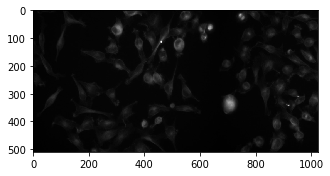

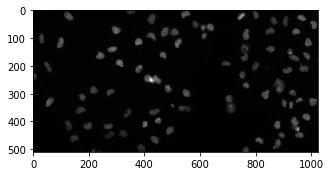

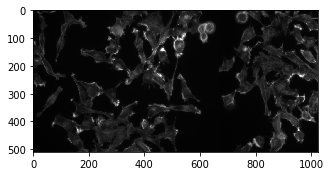

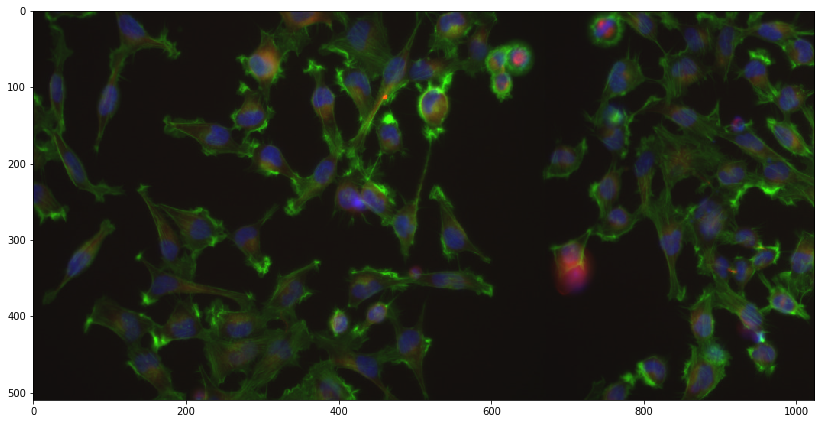

In [6]:
# Look at the images to check that all is OK.
# Use pyplot's functions plt.imshow followed by plt.show. 
# Check the documentation for plt.imshow and note the parameters that can be specified, such as the color map (cmap)
# and interpolation. To switch of interpolation you can set it to 'none'. To apply a colormap to the image, set cmap to
# the name of the color, for example 'gray'.
# You may also want to adjust the size of the figure. You can do this by preparing the figure canvas with
# the function plt.figure before calling plt.imshow. The canvas size is adjusted using the keyword argument
# figsize when calling plt.figure.
import matplotlib.pyplot as plt

plt.figure(figsize=[5.1, 10.24])
plt.imshow(fitc, interpolation='None', cmap='gray')
plt.show()
plt.figure(figsize=[5.1, 10.24])
plt.imshow(hoechst, interpolation='None', cmap='gray')
plt.show()
plt.figure(figsize=[5.1, 10.24])
plt.imshow(tritc, interpolation='None', cmap='gray')
plt.show()

# Create a composite image.
# The function gray2rgb from the module skimage.color converts a grayscale image into an rgb image. The resulting 
# rgb image is a three dimensional array in which each channel r,g and b contains the same numbers.
# In order to create a composite image of the three input images, you can set the unwanted channels to zero in each image 
# by multiplying the image with a corresponding vector, for example [1, 0 ,0] to keep only the red channel and then add 
# the three images using the + operation. Store the new image in a variable composite. Display the composite image using
# the functions above.
fitc_rgb = skimage.color.gray2rgb(fitc)
hoechst_rgb = skimage.color.gray2rgb(hoechst)
tritc_rgb = skimage.color.gray2rgb(tritc)

tritc_green = tritc_rgb * [0,1,0]
hoechst_blue = hoechst_rgb * [0,0,1]
fitc_red = fitc_rgb * [1,0,0]

composite = fitc_red + tritc_green + hoechst_blue
plt.figure(figsize=[14, 14])
plt.imshow(composite)
plt.show()

## Exercises 6 - save image

In [8]:
# import imsave from skimage.io
# save composite image
from skimage.io import imsave

imsave('/home/cedric/Documents/Atelier_Mifobio/jupyter-workshop-mifobio-2018/exercises/composite.jpeg',composite, quality = 100)